In [ ]:
%matplotlib qt

# Finding Feature Importance (through Random Forest)

In [1]:
import  ipynb.fs.full.concat_project2 as emotex_lib
from ipynb.fs.full.concat_project2 import x_y_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.neural_network import MLPClassifier
from scipy.signal import butter, sosfiltfilt
import python_speech_features
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from ipynb.fs.full.Pitch_vector import get_pitch_stats
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
import time
import  ipynb.fs.full.concat_project2 as emotex_lib
from sklearn.model_selection import KFold
from keras.optimizers import Adadelta
from keras.layers import Conv2D
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
import keras as keras
from  conch.analysis.formants import lpc
import csv
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.features import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

Using TensorFlow backend.


# Import data

In [ ]:
features, y = data_extract_all()
X_train, X_val, X_test, y_train, y_val, y_test = x_y_split(features, y)

In [5]:
X_train, X_val, X_test, y_train, y_val, y_test = np.load("../../splitdata.npy", allow_pickle=True)

In [2]:
#TESS Dataset Import
X_train_TESS, X_test_TESS, y_train_TESS, y_test_TESS = np.load("TESS_data.npy", allow_pickle = True)

In [7]:
#RAVDESS Dataset Import
data_RAV, fs_RAV, x_size = emotex_lib.data_extraction_RAVDESS('../../RAVDESS')
y_RAV = emotex_lib.emotion_extraction_RAVDESS('../../RAVDESS',x_size)
X_train_RAV, X_test_RAV, y_train_RAV, y_test_RAV = x_y_split(data_RAV, fs_RAV, y_RAV)

In [11]:
X_train_RAV, X_test_RAV, y_train_RAV, y_test_RAV = np.load("RAVDESS_X_Y_train_test.npy", allow_pickle = True)

In [8]:
#CREMA Dataset Import
data_CREMA, fs_CREMA, y_CREMA = emotex_lib.data_extract_CREMA()

X_train_CREMA, X_test_CREMA, y_train_CREMA, y_test_CREMA = np.load("CREMA_data.npy", allow_pickle = True)

ValueError: not enough values to unpack (expected 4, got 3)

In [6]:
#Classifies all the feature labels
feat_labels = ['MFCC_1_Mean', 'MFCC_1_Median','MFCC_1_Var', 'MFCC_1_Min', 
               'MFCC_1_Max', 'MFCC_1_dMean','MFCC_1_dVar', 'MFCC_2_Mean',
               'MFCC_2_Median','MFCC_2_Var', 'MFCC_2_Min', 'MFCC_2_Max',
               'MFCC_2_dMean','MFCC_2_dVar', 'MFCC_3_Mean', 'MFCC_3_Median',
               'MFCC_3_Var', 'MFCC_3_Min', 'MFCC_3_Max', 'MFCC_3_dMean',
               'MFCC_3_dVar','MFCC_4_Mean', 'MFCC_4_Median',
               'MFCC_4_Var', 'MFCC_4_Min', 'MFCC_4_Max', 'MFCC_4_dMean',
               'MFCC_4_dVar','MFCC_5_Mean', 'MFCC_5_Median',
               'MFCC_5_Var', 'MFCC_5_Min', 'MFCC_5_Max', 'MFCC_5_dMean',
               'MFCC_5_dVar','MFCC_6_Mean', 'MFCC_6_Median',
               'MFCC_6_Var', 'MFCC_6_Min', 'MFCC_6_Max', 'MFCC_6_dMean',
               'MFCC_6_dVar','MFCC_7_Mean', 'MFCC_7_Median',
               'MFCC_7_Var', 'MFCC_7_Min', 'MFCC_7_Max', 'MFCC_7_dMean',
               'MFCC_7_dVar','MFCC_8_Mean', 'MFCC_8_Median',
               'MFCC_8_Var', 'MFCC_8_Min', 'MFCC_8_Max', 'MFCC_8_dMean',
               'MFCC_8_dVar','MFCC_9_Mean', 'MFCC_9_Median',
               'MFCC_9_Var', 'MFCC_9_Min', 'MFCC_9_Max', 'MFCC_9_dMean',
               'MFCC_9_dVar', 'MFCC_10_Mean', 'MFCC_10_Median',
               'MFCC_10_Var', 'MFCC_10_Min', 'MFCC_10_Max', 'MFCC_10_dMean',
               'MFCC_10_dVar', 'MFCC_11_Mean', 'MFCC_11_Median',
               'MFCC_11_Var', 'MFCC_11_Min', 'MFCC_11_Max', 'MFCC_11_dMean',
               'MFCC_11_dVar','MFCC_12_Mean', 'MFCC_12_Median',
               'MFCC_12_Var', 'MFCC_12_Min', 'MFCC_12_Max', 'MFCC_12_dMean',
               'MFCC_12_dVar', 'MFCC_13_Mean', 'MFCC_13_Median',
               'MFCC_13_Var', 'MFCC_13_Min', 'MFCC_13_Max', 'MFCC_13_dMean',
               'MFCC_13_dVar','Pitch_Mean', 'Pitch_Median', 'Pitch_Min', 'Pitch_Max',
               'Pitch_Var', 'Pitch_dMean', 'Pitch_dMin', 'Pitch_dMax', 'Spectral_Mean', 
               'Spectral_Median', 'Spectral_Min', 'Spectral_Max', 'Spectral_Var', 'Spectral_dMean', 
               'Spectral_dMin', 'Spectral_dMax',
               'RMS_Mean', 'RMS_Median', 'RMS_Min', 'RMS_Max','RMS_Var', 'RMS_dMean', 
               'RMS_dMin', 'RMS_dMax', 'Spec_Rolloff_Mean', 'Spec_Rolloff_Median',
               'Spec_Rolloff_Min', 'Spec_Rolloff_Max','Spec_Rolloff_Var', 'Spec_Rolloff_dMean', 
               'Spec_Rolloff_dMin', 'Spec_Rolloff_dMax', 'Zero_Cutoff_Mean', 'Zero_Cutoff_Median',
               'Zero_Cutoff_Min', 'Zero_Cutoff_Max','Zero_Cutoff_Var', 'Zero_Cutoff_dMean', 
               'Zero_Cutoff_dMin', 'Zero_Cutoff_dMax']

In [9]:
feat_labels_mod = ["MFCCs"]
counter = 0
for i in range(90):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1
feat_labels_mod.append('Pitch')
for i in range(7):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1
feat_labels_mod.append('Spectral')
for i in range(7):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1
feat_labels_mod.append('LPC')
for i in range(7):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1
feat_labels_mod.append('RMS')
for i in range(11):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1
feat_labels_mod.append('spectural roll off')
for i in range(7):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1
feat_labels_mod.append('zero cut off')
for i in range(7):
    if counter % 3:
        feat_labels_mod.append('    .     ')
    else:
        feat_labels_mod.append('          ')
    counter +=1

# Create Random Forest Classifiers

In [ ]:
#Creates a Random Forest Classifier (Classifier chosen as opposed to regression)
clf_TESS = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

#Trains the RF Classifier
clf_TESS.fit(X_train_TESS, y_train_TESS)

In [13]:
#Creates a Random Forest Classifier (Classifier chosen as opposed to regression)
clf_RAV = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

#Trains the RF Classifier
clf_RAV.fit(X_train_RAV, y_train_RAV)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [10]:
#Creates a Random Forest Classifier (Classifier chosen as opposed to regression)
clf_CREMA = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

#Trains the RF Classifier
clf_CREMA.fit(X_train_CREMA, y_train_CREMA)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Gather Features

In [9]:
#Prints the name and the GINI importance of each feature 
sum1 = 0
featureList_TESS = []
for feature in zip(feat_labels, clf_TESS.feature_importances_):
    featureList_TESS.append(feature[1])
    #print(feature)

NameError: name 'feat_labels' is not defined

In [14]:
#Prints the name and the GINI importance of each feature 
sum1 = 0
featureList_RAV = []
for feature in zip(feat_labels, clf_RAV.feature_importances_):
    featureList_RAV.append(feature[1])
    #print(feature)

In [11]:
#Prints the name and the GINI importance of each feature 
sum1 = 0
featureList_CREMA = []
for feature in zip(feat_labels, clf_CREMA.feature_importances_):
    featureList_CREMA.append(feature[1])
    #print(feature)

('MFCC_1_Mean', 0.008302380154958018)
('MFCC_1_Median', 0.008345249011534208)
('MFCC_1_Var', 0.006086431660372063)
('MFCC_1_Min', 0.0059258136241668235)
('MFCC_1_Max', 0.0060651561714930545)
('MFCC_1_dMean', 0.006949904598272417)
('MFCC_1_dVar', 0.008319399330355262)
('MFCC_2_Mean', 0.0071664002300739875)
('MFCC_2_Median', 0.005802751598481585)
('MFCC_2_Var', 0.006770636373317037)
('MFCC_2_Min', 0.009266999575442705)
('MFCC_2_Max', 0.008479860516613001)
('MFCC_2_dMean', 0.009317072365160325)
('MFCC_2_dVar', 0.006421072597138077)
('MFCC_3_Mean', 0.009890845842433289)
('MFCC_3_Median', 0.00730643274103829)
('MFCC_3_Var', 0.006804615216781478)
('MFCC_3_Min', 0.006350541966730028)
('MFCC_3_Max', 0.006126087338705082)
('MFCC_3_dMean', 0.008207197966188906)
('MFCC_3_dVar', 0.006779085646370916)
('MFCC_4_Mean', 0.005920544228205469)
('MFCC_4_Median', 0.006285857241431864)
('MFCC_4_Var', 0.008940413882043223)
('MFCC_4_Min', 0.00740392410865449)
('MFCC_4_Max', 0.007704572949256248)
('MFCC_4_dMe

In [ ]:
percentfeatureList_TESS = [i * 100 for i in featureList_TESS]

In [15]:
percentfeatureList_RAV = [i * 100 for i in featureList_RAV]

In [12]:
percentfeatureList_CREMA = [i * 100 for i in featureList_CREMA]

# RF - All Features (Simple)

In [ ]:
plt.bar(np.arange(len(percentfeatureList_TESS)),percentfeatureList_TESS)

<BarContainer object of 131 artists>

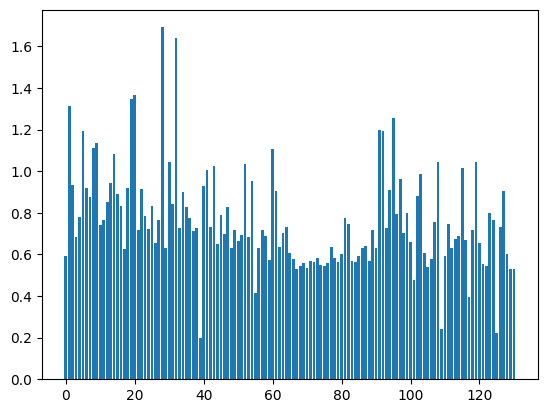

In [11]:
plt.bar(np.arange(len(percentfeatureList_RAV)),percentfeatureList_RAV)

<BarContainer object of 131 artists>

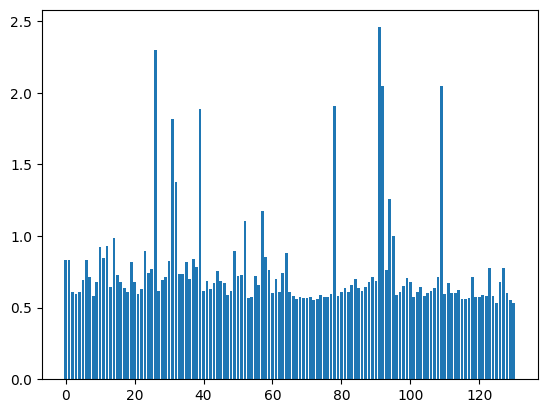

In [13]:
plt.bar(np.arange(len(percentfeatureList_CREMA)),percentfeatureList_CREMA)

# RF - All Features (Complex)

NameError: name 'percentfeatureList_TESS' is not defined

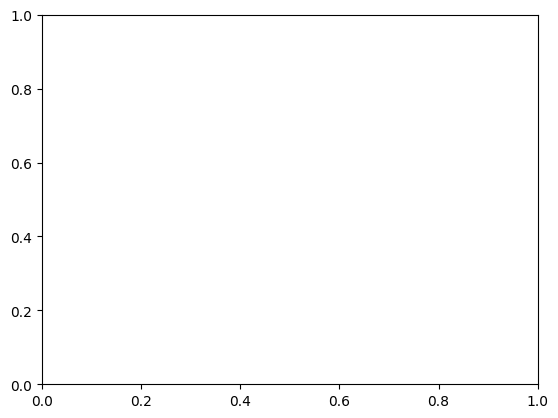

In [14]:
#Big Boi
plt.rcdefaults()
fig, ax = plt.subplots()

x_pos = [i for i, _ in enumerate(feat_labels)]

plt.barh(np.arange(len(percentfeatureList_TESS)), percentfeatureList_TESS, color='green')
plt.ylabel("Feature Name")
plt.xlabel("Percent Impact")
plt.title("Effect of Each Feature on Overall Accuracy - TESS")

plt.yticks(x_pos, feat_labels_mod)

plt.show()



NameError: name 'percentfeatureList_RAV' is not defined

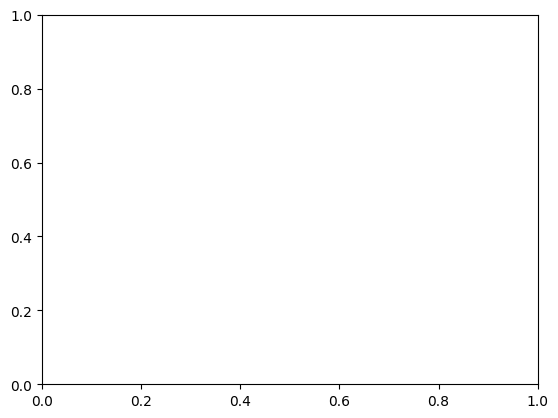

In [15]:
#Big Boi
plt.rcdefaults()
fig, ax = plt.subplots()

x_pos = [i for i, _ in enumerate(feat_labels)]

plt.barh(np.arange(len(percentfeatureList_RAV)), percentfeatureList_RAV, color='green')
plt.ylabel("Feature Name")
plt.xlabel("Percent Impact")
plt.title("Effect of Each Feature on Overall Accuracy - RAV")

plt.yticks(x_pos, feat_labels)

plt.show()



# MFCCs Only

In [ ]:
#MFCCs
plt.rcdefaults()
fig, ax = plt.subplots()

MFCC_list = percentfeatureList_TESS[:91]
MFCC_label_list = feat_labels_mod[:91]

x_pos = [i for i, _ in enumerate(MFCC_label_list)]

plt.barh(np.arange(len(MFCC_list)), MFCC_list, color='green')
plt.ylabel("Feature Name")
plt.xlabel("Percent Impact")
plt.title("Effect of Each Feature on Overall Accuracy - TESS")

plt.yticks(x_pos, MFCC_label_list)

plt.show()

# Non-MFCCs

NameError: name 'percentfeatureList_TESS' is not defined

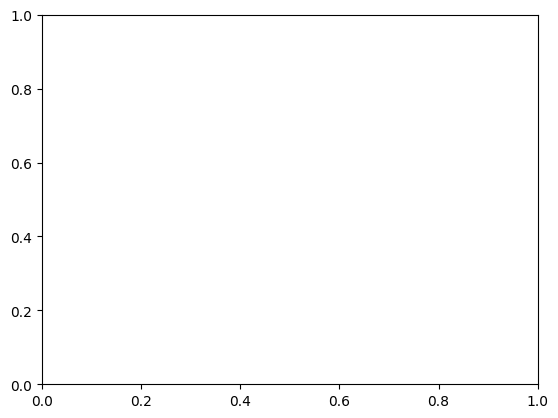

In [16]:
plt.rcdefaults()
fig, ax = plt.subplots()

MFCC_list = percentfeatureList_TESS[92:]
MFCC_label_list = feat_labels[92:]

x_pos = [i for i, _ in enumerate(MFCC_label_list)]

plt.barh(np.arange(len(MFCC_list)), MFCC_list, color='green')
plt.ylabel("Feature Name")
plt.xlabel("Percent Impact")
plt.title("Effect of Each Feature on Overall Accuracy - TESS")

plt.yticks(x_pos, MFCC_label_list)

plt.show()

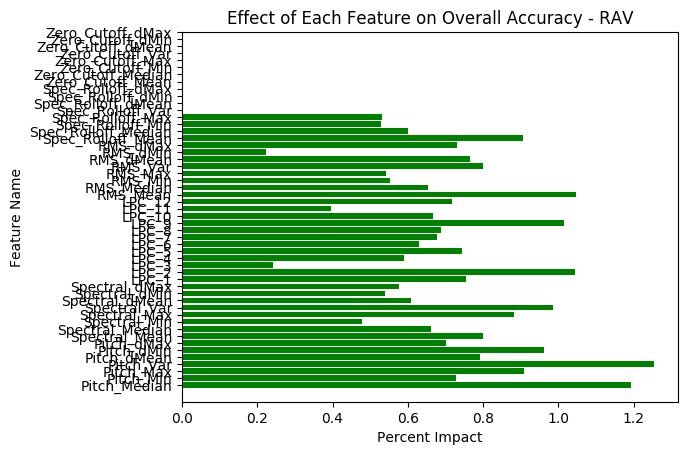

In [17]:
plt.rcdefaults()
fig, ax = plt.subplots()

MFCC_list = percentfeatureList_RAV[92:]
MFCC_label_list = feat_labels[92:]

x_pos = [i for i, _ in enumerate(MFCC_label_list)]

plt.barh(np.arange(len(MFCC_list)), MFCC_list, color='green')
plt.ylabel("Feature Name")
plt.xlabel("Percent Impact")
plt.title("Effect of Each Feature on Overall Accuracy - RAV")

plt.yticks(x_pos, MFCC_label_list)

plt.show()

In [ ]:
print(percentfeatureList_TESS[107:119])
print(featureList_TESS[107])

# Recursive Feature Elimination

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr

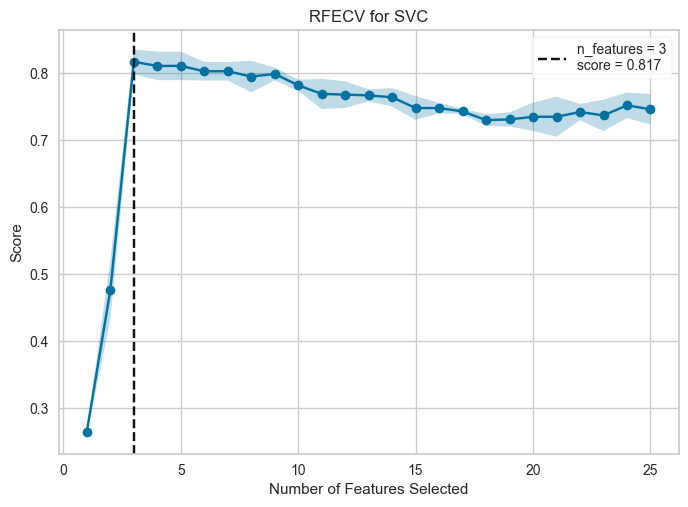

In [21]:
# Create a dataset with only 3 informative features
X, y = make_classification(
    n_samples=1000, n_features=25, n_informative=3, n_redundant=2,
    n_repeated=0, n_classes=8, n_clusters_per_class=1, random_state=0
)

# Create RFECV visualizer with linear SVM classifier
viz = RFECV(SVC(kernel='linear', C=1))
viz.fit(X, y)
viz.poof()


ValueError: bad input shape (1104, 16)

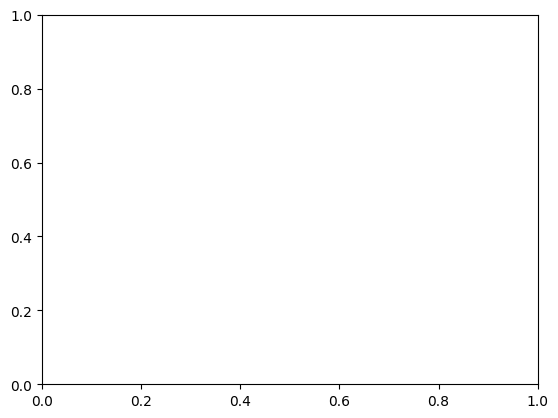

In [29]:
target = 'default'
features = feat_labels

oz = RFECV(RandomForestClassifier(), cv=5, scoring='f1_weighted')

oz.fit(X_train_RAV, y_train_RAV)
oz.poof()

In [36]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X_train_RAV, y_train_RAV)

ValueError: bad input shape (1104, 16)

In [40]:
svm = LinearSVC()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 3)
rfe = rfe.fit(X_train_RAV, y_train_RAV)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

ValueError: bad input shape (1104, 16)

# Feature Selection

In [41]:
sfm_RAV = SelectFromModel(clf_RAV, threshold=0.000935)

sfm_RAV.fit(X_train_RAV, y_train_RAV)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
     

In [42]:
# Print the names of the most important features
sum = 0
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])
    sum+= 1
    
sum

NameError: name 'sfm' is not defined

In [ ]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train_TESS = sfm.transform(X_train_TESS)
X_important_test_TESS = sfm.transform(X_test_TESS)

In [ ]:
X_important_train_RAV = sfm.transform(X_train_RAV)
X_important_test_RAV = sfm.transform(X_test_RAV)

In [ ]:
# Create a new random forest classifier for the most important features
clf_important_TESS = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important_TESS.fit(X_important_train_TESS, y_train_TESS)

In [ ]:
clf_important_RAV = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

clf_important_RAV.fit(X_important_train_RAV, y_train_RAV)

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_pred_TESS = clf_TESS.predict(X_test_TESS)

# View The Accuracy Of Our Full Feature (4 Features) Model
print(accuracy_score(y_test_TESS, y_pred_TESS,  normalize = True) * 100, "%")

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_pred_RAV = clf_TESS.predict(X_test_RAV)

# View The Accuracy Of Our Full Feature (4 Features) Model
print(accuracy_score(y_test_RAV, y_pred_RAV,  normalize = True) * 100, "%")

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred_TESS = clf_important_TESS.predict(X_important_test_TESS)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test_TESS, y_important_pred_TESS)

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred_RAV = clf_important_RAV.predict(X_important_test_RAV)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test_RAV, y_important_pred_RAV)

In [ ]:
def MLPalgorithm(X_train, X_test, y_train, y_test):
   mlp = MLPClassifier(max_iter=15000)
   mlp.fit(X_train,y_train)
   predictions = mlp.predict(X_train)
   print(classification_report(y_train,predictions))
   predictions = mlp.predict(X_test)
   print(classification_report(y_test,predictions))

In [ ]:
MLPalgorithm(X_train_TESS, X_test_TESS, y_train_TESS, y_test_TESS)

In [14]:
def RandomForest(X_train, X_test, y_train, y_test):
    clf_important_TESS = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
    clf_important_TESS.fit(X_train, y_train)

    print(predictions)
    predictions = clf_important_TESS.predict(X_train)
    print(classification_report(y_train,predictions))
    print(np.sum(predictions))
    predictions = clf_important_TESS.predict(X_test)
    print(np.sum(predictions))
    print(classification_report(y_test,predictions))

In [26]:
RandomForest(X_train_TESS, X_test_TESS, y_train_TESS, y_test_TESS)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       313
           3       1.00      1.00      1.00       312
           4       1.00      1.00      1.00       332
           5       1.00      1.00      1.00       328
           6       1.00      1.00      1.00       321

   micro avg       1.00      1.00      1.00      2240
   macro avg       1.00      1.00      1.00      2240
weighted avg       1.00      1.00      1.00      2240
 samples avg       1.00      1.00      1.00      2240

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        80
           1       1.00      0.88      0.94        86
           2       1.00      0.94      0.97        87
           3       1.00      0.91      0.95        88
           4       1.00      0.99      0.99        68
           5       0.98 

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [25]:
RandomForest(X_train_RAV, X_test_RAV, y_train_RAV, y_test_RAV)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00        76
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        77
           7       1.00      1.00      1.00        77
           8       1.00      1.00      1.00        80
           9       1.00      1.00      1.00        68
          10       1.00      1.00      1.00        76
          11       1.00      1.00      1.00        71
          12       1.00      1.00      1.00        77
          13       1.00      1.00      1.00        67
          14       1.00      1.00      1.00        74
          15       1.00      1.00      1.00        69

   micro avg       1.00      1.00      1.00      1104
   macro avg       1.00   

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         9
           2       1.00      0.12      0.22        16
           3       1.00      0.10      0.17        21
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        11
           8       1.00      0.06      0.12        16
           9       1.00      0.15      0.26        20
          10       0.00      0.00      0.00        20
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00        19
          13       0.00      0.00      0.00        21
          14       0.00      0.00      0.00        22
          15       0.00      0.00      0.00        19

   micro avg       1.00      0.03      0.06       276
   macro avg       0.25   

In [18]:
RandomForest(X_train_CREMA, X_test_CREMA, y_train_CREMA, y_test_CREMA)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       528
           1       1.00      1.00      1.00       549
           2       1.00      1.00      1.00       537
           3       1.00      1.00      1.00       535
           4       1.00      1.00      1.00       477
           5       1.00      1.00      1.00       532
           6       1.00      1.00      1.00       493
           7       1.00      1.00      1.00       472
           8       1.00      1.00      1.00       475
           9       1.00      1.00      1.00       469
          10       1.00      1.00      1.00       416
          11       1.00      1.00      1.00       469

   micro avg       1.00      1.00      1.00      5952
   macro avg       1.00      1.00      1.00      5952
weighted avg       1.00      1.00      1.00      5952
 samples avg       1.00      1.00      1.00      5952



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.90      0.20      0.32       143
           1       0.00      0.00      0.00       122
           2       0.00      0.00      0.00       134
           3       0.00      0.00      0.00       136
           4       1.00      0.03      0.06        98
           5       0.79      0.17      0.27       139
           6       0.72      0.17      0.27       107
           7       0.00      0.00      0.00       128
           8       0.00      0.00      0.00       125
           9       0.00      0.00      0.00       131
          10       0.00      0.00      0.00        96
          11       0.73      0.08      0.15       130

   micro avg       0.78      0.06      0.10      1489
   macro avg       0.35      0.05      0.09      1489
weighted avg       0.34      0.06      0.09      1489
 samples avg       0.06      0.06      0.06      1489



In [20]:
RandomForest(X_train, X_val, y_train, y_val)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       608
           2       1.00      1.00      1.00       613
           3       1.00      1.00      1.00       599
           4       1.00      1.00      1.00       573
           5       1.00      1.00      1.00       622
           6       1.00      1.00      1.00       860
           7       1.00      1.00      1.00       873
           8       1.00      1.00      1.00       870
           9       1.00      1.00      1.00       889
          10       1.00      1.00      1.00       839
          11       1.00      1.00      1.00       869

   micro avg       1.00      1.00      1.00      8829
   macro avg       1.00      1.00      1.00      8829
weighted avg       1.00      1.00      1.00      8829
 samples avg       1.00      1.00      1.00      8829

8827.0
299.0
              precision    recall  f1-score   support

           

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [22]:

clf_important_TESS = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf_important_TESS.fit(X_train, y_train)

predictions = clf_important_TESS.predict(X_train)
print(predictions)
print(classification_report(y_train,predictions))
print(np.sum(predictions))
predictions = clf_important_TESS.predict(X_test)
print(np.sum(predictions))
print(classification_report(y_test,predictions))

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       608
           2       1.00      1.00      1.00       613
           3       1.00      1.00      1.00       599
           4       1.00      1.00      1.00       573
           5       1.00      1.00      1.00       622
           6       1.00      1.00      1.00       860
           7       1.00      1.00      1.00       873
           8       1.00      1.00      1.00       870
           9       1.00      1.00      1.00       889
          10       1.00      1.00      1.00       839
          11       1.00      1.00      1.00       869

   micro avg       1.00      1.00      1.00      8829
   macro avg       1.00      1.00      1.00      8829
weighted avg       1.00      1.0

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


276.0
              precision    recall  f1-score   support

           0       0.91      0.12      0.22        80
           1       0.00      0.00      0.00        73
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00        89
           4       0.58      0.09      0.16        77
           5       0.85      0.15      0.25        75
           6       0.98      0.43      0.60       118
           7       1.00      0.26      0.41       104
           8       1.00      0.30      0.46       108
           9       1.00      0.38      0.55       100
          10       1.00      0.36      0.53        98
          11       0.91      0.49      0.63       105

   micro avg       0.95      0.24      0.38      1104
   macro avg       0.69      0.21      0.32      1104
weighted avg       0.73      0.24      0.35      1104
 samples avg       0.24      0.24      0.24      1104



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [16]:
X_train.shape

(8829, 131)

In [17]:
y_train.shape

(8829, 12)

In [18]:
X_val.shape

(1104, 131)

In [19]:
y_val.shape

(1104, 12)

In [24]:
print(predictions[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
